In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_gene_filter = pd.read_csv("../data_preprocessing/data_preprocessing_combine_finnal.csv")
df_gene_filter.drop(columns="Unnamed: 0",inplace=True)
df_gene_filter

,Sample,OR1E2,TUSC5,AASDHPPT,AQP7,LIPK,AIPL1,XM_373670,C1ORF187,FNBP4,...,SLC7A5,ONECUT2,GPR172B,AGK,TMEM14B,PIPOX,MND1,ATP6V0A4,PPP1R3C,label
0,GSM3076582,6.581220,6.688305,6.741024,6.740158,6.450692,6.921650,6.903018,6.705819,8.778815,...,7.859030,6.583751,6.508321,6.959389,7.092078,6.508321,6.581220,6.528690,6.508321,1.0
1,GSM3076584,6.469258,6.489694,6.930636,6.528830,6.387897,6.784161,7.106279,6.689787,9.312376,...,8.305035,6.619171,6.429319,7.275144,7.670455,6.449538,6.429319,6.513083,6.623958,1.0
2,GSM3076586,6.435401,6.397368,7.043787,6.592287,6.527094,6.674845,6.956772,6.691307,9.561462,...,7.614169,6.567367,6.454378,7.336031,7.757373,6.664901,6.527094,6.567624,6.543505,1.0
3,GSM3076588,6.649721,6.528980,6.909826,6.549388,6.467235,6.744593,6.996439,6.716519,9.289106,...,8.185950,6.581991,6.446086,7.108844,7.338425,6.424871,6.424871,6.495675,6.446086,0.0
4,GSM3076590,6.314682,6.645236,6.984183,6.690670,6.525904,6.790555,6.770173,6.651434,9.547892,...,7.631164,6.560580,6.612198,7.436369,7.972051,6.450317,6.560841,6.527148,6.578445,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,GSM3080176,6.478888,6.652626,6.688672,6.432780,6.538850,6.513969,6.792356,6.659403,7.830163,...,7.718400,6.618477,6.657382,6.832535,7.562649,6.457882,6.518911,6.625712,6.633629,0.0
1038,GSM3080177,6.421064,6.638464,7.083479,6.615356,6.417832,6.607272,6.900284,6.607437,8.485269,...,7.590302,6.582872,6.714842,6.942387,8.308571,6.480475,6.448664,6.533901,6.629859,0.0
1039,GSM3080178,6.485310,6.660722,7.144724,6.450517,6.465697,6.587126,6.884740,6.702011,8.659146,...,7.487854,6.626871,6.568408,7.170392,8.254397,6.532769,6.504432,6.562634,6.606571,0.0
1040,GSM3080179,6.503056,6.677416,6.967806,6.596454,6.511638,6.499526,7.049166,6.691996,8.078439,...,7.560744,6.649050,6.621918,7.004240,7.914436,6.576983,6.393231,6.530213,6.927922,0.0


In [3]:
feature_ipt = pd.read_csv('../data_preprocessing/mmpc_feature.csv')
feature_ipt

,feature
0,STAU2
1,SLC40A1
2,IL2RB
3,FER1L3
4,BC080552
5,LOC730656
6,ABCA1
7,MYO5C
8,MGC24103
9,AL157484


In [4]:
df_label = df_gene_filter.iloc[:,-1]
df_label

0       1.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
1037    0.0
1038    0.0
1039    0.0
1040    0.0
1041    1.0
Name: label, Length: 1042, dtype: float64

In [5]:
df_filter = df_gene_filter[feature_ipt["feature"]]
df_filter.head()

,STAU2,SLC40A1,IL2RB,FER1L3,BC080552,LOC730656,ABCA1,MYO5C,MGC24103,AL157484,...,OLIG2,IL18,BRI3,SSTR5,SYTL3,NRG1,LDLR,RNF165,VPS13C,GPR97
0,6.827648,7.915286,8.604720,6.966753,7.030301,6.581220,8.851976,6.740158,6.809931,8.363024,...,6.757244,12.903117,11.364924,6.688305,9.173028,6.546042,7.592268,7.761827,7.016656,8.896062
1,6.850744,7.526472,8.659305,6.999537,6.917383,6.605169,8.789759,6.850744,6.733241,8.917389,...,6.733241,12.995269,11.185766,6.449538,8.905537,6.641074,7.768980,7.456616,6.976836,8.332178
2,7.023531,7.871582,9.133012,7.077072,6.770716,6.691402,8.904024,6.677929,6.691402,8.731037,...,6.677929,13.005459,11.288711,6.527094,8.685605,6.671845,7.499118,7.462702,7.089554,8.276253
3,6.487721,6.966833,8.830177,7.689700,7.283117,6.487721,8.659305,6.528980,6.854683,9.575752,...,7.784972,13.049241,10.673494,6.487721,8.739087,6.599425,7.674013,7.475896,7.498168,7.892145
4,7.000783,7.576301,9.090617,7.304761,6.938120,6.392738,8.692033,6.718180,6.675939,9.020216,...,7.017417,12.663681,11.150390,6.469428,8.389135,6.531331,7.620191,7.206908,7.125501,7.851027


In [6]:
df_filter

,STAU2,SLC40A1,IL2RB,FER1L3,BC080552,LOC730656,ABCA1,MYO5C,MGC24103,AL157484,...,OLIG2,IL18,BRI3,SSTR5,SYTL3,NRG1,LDLR,RNF165,VPS13C,GPR97
0,6.827648,7.915286,8.604720,6.966753,7.030301,6.581220,8.851976,6.740158,6.809931,8.363024,...,6.757244,12.903117,11.364924,6.688305,9.173028,6.546042,7.592268,7.761827,7.016656,8.896062
1,6.850744,7.526472,8.659305,6.999537,6.917383,6.605169,8.789759,6.850744,6.733241,8.917389,...,6.733241,12.995269,11.185766,6.449538,8.905537,6.641074,7.768980,7.456616,6.976836,8.332178
2,7.023531,7.871582,9.133012,7.077072,6.770716,6.691402,8.904024,6.677929,6.691402,8.731037,...,6.677929,13.005459,11.288711,6.527094,8.685605,6.671845,7.499118,7.462702,7.089554,8.276253
3,6.487721,6.966833,8.830177,7.689700,7.283117,6.487721,8.659305,6.528980,6.854683,9.575752,...,7.784972,13.049241,10.673494,6.487721,8.739087,6.599425,7.674013,7.475896,7.498168,7.892145
4,7.000783,7.576301,9.090617,7.304761,6.938120,6.392738,8.692033,6.718180,6.675939,9.020216,...,7.017417,12.663681,11.150390,6.469428,8.389135,6.531331,7.620191,7.206908,7.125501,7.851027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,6.906134,7.187674,9.449836,6.880409,7.835880,6.551610,6.744091,6.745285,7.044096,8.824455,...,7.479693,13.339397,10.028558,6.502977,8.093325,6.701982,7.796124,7.132844,7.238020,7.747274
1038,6.802736,8.221581,9.538136,6.824118,7.158885,6.576480,8.109153,6.741811,6.766979,8.293475,...,6.908617,13.177152,10.161913,6.355886,8.764983,6.664663,7.635214,7.035870,7.007228,7.971264
1039,6.745716,7.546144,10.490795,6.942745,7.454734,6.593668,7.486759,6.831080,6.940422,8.875184,...,7.295154,13.305206,9.917379,6.561785,8.194276,6.642215,7.809693,7.614972,7.117615,7.668293
1040,6.725860,7.245622,9.402771,6.772230,7.566920,6.632561,7.790773,6.661368,6.999837,8.817710,...,6.954671,13.511535,9.934537,6.575676,8.202512,6.601802,7.656712,7.578806,7.183229,7.698907


In [8]:
df_filter.median()

STAU2         6.698146
SLC40A1       7.411441
IL2RB         9.417827
FER1L3        6.973411
BC080552      7.332201
LOC730656     6.556306
ABCA1         8.059843
MYO5C         6.665099
MGC24103      6.895208
AL157484      8.820362
LOC653591     6.827246
CDAN1         8.469601
AK124771      6.889483
ERVWE1        6.756203
OLIG2         6.908478
IL18         13.320870
BRI3         10.350489
SSTR5         6.482427
SYTL3         8.414828
NRG1          6.610794
LDLR          7.575057
RNF165        7.494211
VPS13C        7.184138
GPR97         7.628776
dtype: float64

In [19]:
from sklearn.decomposition import PCA
def reverse_dimension(data,demension=2):
    pca = PCA(n_components=demension)
    pca.fit(data)
    transform_data = pca.transform(data)
    return transform_data

In [20]:
a = pd.DataFrame(reverse_dimension(df_filter),columns=["pc1",'pc2'])
a

,pc1,pc2
0,-1.766267,0.450427
1,-1.410156,0.315180
2,-1.481620,0.662231
3,-0.263831,0.391663
4,-1.094131,0.448074
...,...,...
1037,0.860132,-0.966127
1038,-0.682906,-0.105731
1039,0.957947,0.212568
1040,0.433446,-0.416110


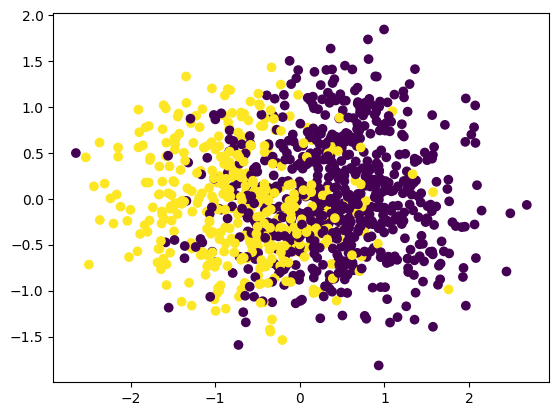

In [21]:
plt.scatter(a['pc1'],a['pc2'],c=df_label)

In [22]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
model = RidgeClassifier(random_state=11)
params = {
    'alpha':[0.1,1,10,100,1000],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
}
grid_search = GridSearchCV(estimator=model,param_grid=params,cv=5,verbose=2,return_train_score=True)
grid_search.fit(df_filter,df_label)
best_estimator = grid_search.best_estimator_
best_estimator.fit(df_filter,df_label)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END .........................alpha=0.1, solver=cholesky; total time=   0.0s
[CV] END .........................alpha=0.1, so

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py", line 146

RidgeClassifier(alpha=100, random_state=11)

In [23]:
grid_search.best_params_

{'alpha': 100, 'solver': 'auto'}

In [24]:
lr_coef = best_estimator.coef_[0]
lr_coef
df_lr_coef = pd.DataFrame({'Gene':df_filter.columns,'coef':lr_coef})
df_lr_coef

,Gene,coef
0,STAU2,0.117147
1,SLC40A1,0.131603
2,IL2RB,-0.183808
3,FER1L3,-0.245651
4,BC080552,-0.107412
5,LOC730656,0.062824
6,ABCA1,0.173677
7,MYO5C,0.066861
8,MGC24103,-0.112566
9,AL157484,-0.230726


In [25]:
df_lr_coef['coef'] = abs(df_lr_coef['coef'])
df_lr_coef = df_lr_coef.sort_values(by='coef',ascending=False).reset_index().drop(columns=['index'],axis=1)
df_lr_coef

,Gene,coef
0,IL18,0.308100
1,FER1L3,0.245651
2,AL157484,0.230726
3,VPS13C,0.217905
4,LOC653591,0.185959
5,IL2RB,0.183808
6,ABCA1,0.173677
7,ERVWE1,0.167853
8,LDLR,0.148391
9,SYTL3,0.136935


In [26]:
df_lr_coef['Gene'].to_csv('./feature_ranks_mmpc.csv',index=None)